In [1]:
import xarray as xr
import movingpandas as mpd
import holoviews as hv
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset(
    "https://thredds.niva.no/thredds/dodsC/datasets/ferryboxes/norsoop/color_fantasy/merged_acdd_color_fantasy.nc"
)
ds

<xarray.Dataset>
Dimensions:          (time: 1689725)
Coordinates:
  * time             (time) datetime64[ns] 2017-01-01T13:25:03 ... 2022-12-31...
    longitude        (time) float64 ...
    latitude         (time) float64 ...
Data variables:
    temperature      (time) float64 ...
    salinity         (time) float64 ...
    oxygen           (time) float64 ...
    temperature_qc   (time) float32 ...
    salinity_qc      (time) float32 ...
    oxygen_qc        (time) float32 ...
    trajectory_name  |S64 ...
Attributes: (12/42)
    title:                                     Ferrybox on MS Color Fantasy
    summary:                                   Ferry sailing from Oslo, Norwa...
    title_no:                                  FerryBox på MS Color Fantasy
    summary_no:                                Ferje fra Oslo, Norge til Kiel...
    date_created:                              2023-10-20 08:26:39.987078
    keywords:                                  GCMDSK:EARTH SCIENCE > OCEANS ...
    ...                                        ...
    history:                                   Built with dscreator(https://g...
    source:                                    Ferryboxes
    _NCProperties:                             version=2,netcdf=4.7.4,hdf5=1....
    id:                                        14bb8759-81d8-4a1a-948a-14219d...
    THREDDSMetadata_services_opendap_service:  https://thredds.niva.no/thredd...
    DODS_EXTRA.Unlimited_Dimension:            time

# Subset the data

If you don't need the full dataset it is important to subset the dataset to avoid downloading all the data.

In [3]:
ds_2022 = ds.sel(time="2022")
ds_2022

<xarray.Dataset>
Dimensions:          (time: 336263)
Coordinates:
  * time             (time) datetime64[ns] 2022-01-01T13:43:59 ... 2022-12-31...
    longitude        (time) float64 ...
    latitude         (time) float64 ...
Data variables:
    temperature      (time) float64 ...
    salinity         (time) float64 ...
    oxygen           (time) float64 ...
    temperature_qc   (time) float32 ...
    salinity_qc      (time) float32 ...
    oxygen_qc        (time) float32 ...
    trajectory_name  |S64 ...
Attributes: (12/42)
    title:                                     Ferrybox on MS Color Fantasy
    summary:                                   Ferry sailing from Oslo, Norwa...
    title_no:                                  FerryBox på MS Color Fantasy
    summary_no:                                Ferje fra Oslo, Norge til Kiel...
    date_created:                              2023-10-20 08:26:39.987078
    keywords:                                  GCMDSK:EARTH SCIENCE > OCEANS ...
    ...                                        ...
    history:                                   Built with dscreator(https://g...
    source:                                    Ferryboxes
    _NCProperties:                             version=2,netcdf=4.7.4,hdf5=1....
    id:                                        14bb8759-81d8-4a1a-948a-14219d...
    THREDDSMetadata_services_opendap_service:  https://thredds.niva.no/thredd...
    DODS_EXTRA.Unlimited_Dimension:            time

# Create a movingpandas trajectory

The dataset follows climate and forecast convention with featuretype trajectory, this makes it easy to create a trajectory in movingpandas also. 

In [4]:
traj = mpd.Trajectory(
    df=ds_2022.to_dataframe(), traj_id=str(ds_2022.trajectory_name.values), t="time", x="longitude", y="latitude"
)

In [5]:
traj.df.head()

,temperature,salinity,oxygen,temperature_qc,salinity_qc,oxygen_qc,trajectory_name,geometry
time,,,,,,,,
2022-01-01 13:43:59,5.721,15.357,87.084,1.0,1.0,1.0,b'color_fantasy',POINT (10.25410 54.44780)
2022-01-01 13:44:59,5.694,15.314,87.618,1.0,1.0,1.0,b'color_fantasy',POINT (10.25890 54.45120)
2022-01-01 13:45:59,5.633,15.262,88.002,1.0,1.0,1.0,b'color_fantasy',POINT (10.28250 54.46690)
2022-01-01 13:46:59,5.609,15.257,88.128,1.0,1.0,1.0,b'color_fantasy',POINT (10.26880 54.45820)
2022-01-01 13:48:00,5.573,15.260,89.927,1.0,1.0,1.0,b'color_fantasy',POINT (10.27390 54.46160)


### Split the trajectory based on stops longer than 60min

In [6]:
split = mpd.ObservationGapSplitter(traj).split(gap=timedelta(minutes=60))
split

TrajectoryCollection with 326 trajectories

In [7]:
split.to_traj_gdf()

,traj_id,start_t,end_t,geometry,length,direction
0,b'color_fantasy'_0,2022-01-01 13:43:59,2022-01-02 08:39:53,"LINESTRING (10.25410 54.44780, 10.25890 54.451...",1.084393e+06,2.374327
1,b'color_fantasy'_1,2022-01-02 13:42:24,2022-01-03 08:00:16,"LINESTRING (10.62660 59.86630, 10.64250 59.874...",1.040077e+06,182.600894
2,b'color_fantasy'_2,2022-01-03 14:01:52,2022-01-04 08:38:46,"LINESTRING (10.23890 54.43680, 10.24320 54.440...",6.917597e+05,2.442050
3,b'color_fantasy'_3,2022-01-04 13:27:15,2022-01-05 08:00:09,"LINESTRING (10.62910 59.86760, 10.62310 59.864...",6.700237e+05,182.618249
4,b'color_fantasy'_4,2022-01-05 13:52:53,2022-01-05 23:59:21,"LINESTRING (10.22780 54.42870, 10.23160 54.431...",3.391608e+05,17.282783
...,...,...,...,...,...,...
321,b'color_fantasy'_322,2022-12-26 13:56:00,2022-12-27 08:42:00,"LINESTRING (10.28004 54.47362, 10.28571 54.476...",6.634657e+05,2.233815
322,b'color_fantasy'_323,2022-12-27 13:16:00,2022-12-28 08:05:00,"LINESTRING (10.63944 59.87243, 10.63286 59.868...",6.786155e+05,182.676095
323,b'color_fantasy'_324,2022-12-28 14:08:00,2022-12-29 08:45:00,"LINESTRING (10.24334 54.44492, 10.24767 54.448...",6.672627e+05,2.422270
324,b'color_fantasy'_325,2022-12-29 13:25:00,2022-12-30 08:01:00,"LINESTRING (10.57509 59.83571, 10.57179 59.830...",6.743704e+05,182.303731


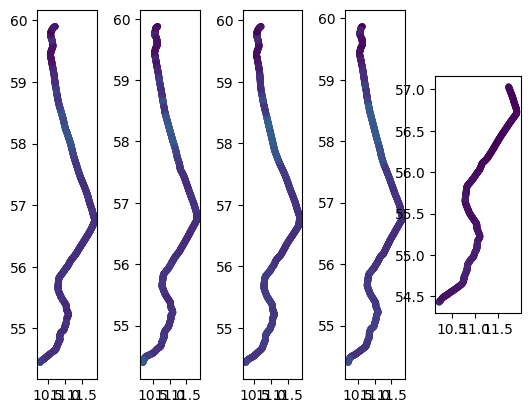

In [8]:
# assumes you have a 5 sub trajectories
fig, axes = plt.subplots(nrows=1, ncols=5)
for i, traj in enumerate(split.trajectories[0:5]):
    traj.plot(ax=axes[i], linewidth=5.0, capstyle="round", column="temperature", vmax=20)

# Plot the first segment of the trajectory 

In [9]:
split.trajectories[1].hvplot(
    c="salinity", title=ds.attrs["title"], line_width=2, frame_width=700, frame_height=500, colorbar=True
)

:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]   (salinity)